Snakes

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import plotly_express as px
from folium.plugins import HeatMap
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
trash_hauler= pd.read_csv('C:/Users/user/Desktop/Cohort 10/Python/Data/trash_hauler_report.csv')

In [ ]:
trash_hauler.dtypes

In [ ]:
trash_hauler_filtered= trash_hauler[trash_hauler['Trash Hauler'] == 'RED RIVER']
trash_hauler_filtered.head()

In [ ]:
Missed_trash = trash_hauler_filtered.loc[trash_hauler_filtered['Request '].str.contains('miss', case=False, na=False)].reset_index()
Missed_trash

In [8]:
Missed_trash['Incident Address'] = Missed_trash['Incident Address'] .fillna('Unknown')
Missed_trash["Incident Address"]= Missed_trash["Incident Address"].str.title()
Missed_trash["Incident Address"].str.replace(".", "", regex=False)

0                                    4028 Clarksville Pike
1                                      6528 Thunderbird Dr
2                                            604 Croley Dr
3                            4484 Lavergne Couchville Pike
4                                      3113 Hydes Ferry Rd
                               ...                        
10710    2709 Crestdale Dr, Nashville, Tn 37214, United...
10711                               2731 Murfreesboro Pike
10712    2943 Windemere Cir, Nashville, Tn 37214, Unite...
10713    3325 Murfreesboro Pike, Nashville, Tn 37013, U...
10714    604 Somerset Ct, Nashville, Tn 37217, United S...
Name: Incident Address, Length: 10715, dtype: object

In [9]:
Missed_trash["Incident Address"] = Missed_trash["Incident Address"].astype(str)

In [10]:
Missed_trash[["Incident Street Adress", "Extra", "Extra", "Extra", "Extra"]] = Missed_trash["Incident Address"].str.split(',', expand=True)
Missed_trash

,index,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Street Adress,Extra
0,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,None
1,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,None
2,4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,None
3,8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,4484 Lavergne Couchville Pike,None
4,10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 Hydes Ferry Rd,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900,3113 Hydes Ferry Rd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, Tn 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319,2709 Crestdale Dr,None
10711,20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,2731 Murfreesboro Pike,None
10712,20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, Tn 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,2943 Windemere Cir,None
10713,20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, Tn 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,3325 Murfreesboro Pike,None


In [11]:
Missed_Trash_Almost_Done = Missed_trash.rename(columns={'Incident Street Adress': 'Incident Street Address'})

In [12]:
Missed_Trash_Almost_Done

,index,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Street Address,Extra
0,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,None
1,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,None
2,4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,None
3,8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,4484 Lavergne Couchville Pike,None
4,10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 Hydes Ferry Rd,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900,3113 Hydes Ferry Rd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, Tn 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319,2709 Crestdale Dr,None
10711,20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,2731 Murfreesboro Pike,None
10712,20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, Tn 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,2943 Windemere Cir,None
10713,20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, Tn 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,3325 Murfreesboro Pike,None


In [13]:
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" St$", " Street", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Ave$", " Avenue", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Rd$", " Road", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Ln$", " Lane", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Blvd$", " Boulevard", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Dr$", " Drive", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Way$", " Way", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Ct$", " Court", regex=False)
Missed_Trash_Almost_Done["Incident Street Address"] = Missed_Trash_Almost_Done["Incident Street Address"].str.replace(" Cir$", " Circle", regex=False)
Missed_Trash_Almost_Done

,index,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Street Address,Extra
0,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,None
1,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,None
2,4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,None
3,8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,4484 Lavergne Couchville Pike,None
4,10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 Hydes Ferry Rd,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900,3113 Hydes Ferry Rd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, Tn 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319,2709 Crestdale Dr,None
10711,20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,2731 Murfreesboro Pike,None
10712,20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, Tn 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,2943 Windemere Cir,None
10713,20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, Tn 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,3325 Murfreesboro Pike,None


In [14]:
Missed_trash_grouped=Missed_Trash_Almost_Done.groupby(['Incident Street Address', 'Zip Code']).size().reset_index(name='Missed Count')
Missed_trash_grouped=Missed_trash_grouped[Missed_trash_grouped['Missed Count'] > 1]
Missed_trash_grouped

,Incident Street Address,Zip Code,Missed Count
4,100 Clydelan Ct,37205.0,2
9,100 Lincoln Ct,37205.0,2
10,100 Nashboro Greens,37217.0,2
13,100 Rhine Dr,37115.0,2
14,100 S Graycroft Ave,37115.0,2
...,...,...,...
7379,954 Percy Warner Blvd,37205.0,2
7382,960 44Th Ave N,37209.0,2
7383,960 Battery Ln,37220.0,2
7388,971 Windrowe Dr,37205.0,2


In [ ]:
#This is the code to see all the rows
#pd.set_option('display.max_rows', None)
#Missed_trash_grouped
pd.reset_option('display.max_rows')

In [15]:
Missed_trash_grouped['Fine'] = Missed_trash_grouped['Missed Count'].apply(lambda x: (x - 1) * 200 if x > 1 else 0)
Missed_trash_grouped.reset_index()

,index,Incident Street Address,Zip Code,Missed Count,Fine
0,4,100 Clydelan Ct,37205.0,2,200
1,9,100 Lincoln Ct,37205.0,2,200
2,10,100 Nashboro Greens,37217.0,2,200
3,13,100 Rhine Dr,37115.0,2,200
4,14,100 S Graycroft Ave,37115.0,2,200
...,...,...,...,...,...
1832,7379,954 Percy Warner Blvd,37205.0,2,200
1833,7382,960 44Th Ave N,37209.0,2,200
1834,7383,960 Battery Ln,37220.0,2,200
1835,7388,971 Windrowe Dr,37205.0,2,200


In [16]:
total_fines= Missed_trash_grouped['Fine'].sum()
print(total_fines)

656000


Make a heat map that shows the most total missed pick ups and another that shows the total fines, each by zip code.

In [17]:
Missed_trash_heatmap_setup=Missed_Trash_Almost_Done.groupby(['Incident Street Address', 'Zip Code', 'State Plan X', 'State Plan Y']).size().reset_index(name='Missed Count')
Missed_trash_heatmap_setup

,Incident Street Address,Zip Code,State Plan X,State Plan Y,Missed Count
0,100 Bluefield Square,37214.0,1.770431e+06,666861.601362,1
1,100 Braxton Hill Ct,37204.0,1.733781e+06,640909.303557,1
2,100 Brook Hollow Rd,37205.0,1.708043e+06,642454.642918,1
3,100 Cedarmont Ct,37211.0,1.760265e+06,622441.107959,1
4,100 Clydelan Ct,37205.0,1.710255e+06,640390.616149,2
...,...,...,...,...,...
8320,Queens Ln,37218.0,1.714591e+06,686127.550777,1
8321,Robin Springs Rd,37220.0,1.732450e+06,639784.397978,1
8322,Trevino Pl,37013.0,1.785940e+06,636624.255256,1
8323,Unknown,37218.0,1.715186e+06,682289.961678,1


In [18]:
Missed_trash_heatmap_setup['Fine']=Missed_trash_heatmap_setup['Missed Count'].apply(lambda x: (x - 1) * 200 if x > 1 else 0)
Missed_trash_heatmap_setup

,Incident Street Address,Zip Code,State Plan X,State Plan Y,Missed Count,Fine
0,100 Bluefield Square,37214.0,1.770431e+06,666861.601362,1,0
1,100 Braxton Hill Ct,37204.0,1.733781e+06,640909.303557,1,0
2,100 Brook Hollow Rd,37205.0,1.708043e+06,642454.642918,1,0
3,100 Cedarmont Ct,37211.0,1.760265e+06,622441.107959,1,0
4,100 Clydelan Ct,37205.0,1.710255e+06,640390.616149,2,200
...,...,...,...,...,...,...
8320,Queens Ln,37218.0,1.714591e+06,686127.550777,1,0
8321,Robin Springs Rd,37220.0,1.732450e+06,639784.397978,1,0
8322,Trevino Pl,37013.0,1.785940e+06,636624.255256,1,0
8323,Unknown,37218.0,1.715186e+06,682289.961678,1,0


In [29]:
Heat_Map=Missed_trash_heatmap_setup[['Zip Code', 'Missed Count']]
Heat_Map

,Zip Code,Missed Count
0,37214.0,1
1,37204.0,1
2,37205.0,1
3,37211.0,1
4,37205.0,2
...,...,...
8320,37218.0,1
8321,37220.0,1
8322,37013.0,1
8323,37218.0,1


<Axes: >

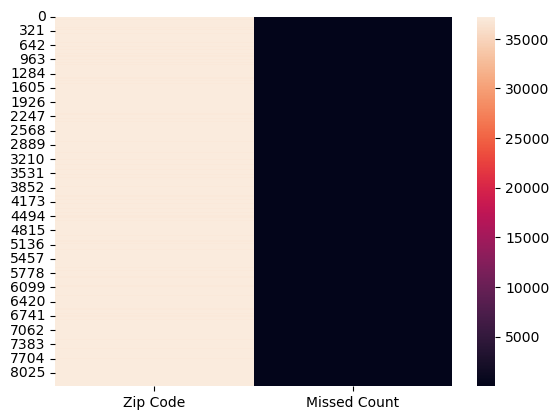